In [1]:
%load_ext autoreload

import numpy as np
from astropy.io import fits
from cacofoni.config import CacofoniConfig
from cacofoni.imaka_io.initimakadatastruct import initimakadatastruct
from cacofoni.imaka_io.irdfits import irdfits

In [4]:
from astropy.io import fits

# Open the FITS file
filename = '../data/aocb0090.fits'
hdul = fits.open(filename)

# Access the primary HDU (0th extension)
data = hdul[0].data

# Get the data shape
# print("Shape of 0th extension:", primary_hdu.data.shape)

# Optional: print header if you want context
#print(primary_hdu.header)

print("State       :", data[:5, 0])
print("Counter     :", data[:5, 1])
print("Gain (P)    :", data[:5, 2]) 
print("Gain (I)    :", data[:5, 3])
print("Gain (D/PB) :", data[:5, 4])

# print(1 / np.mean(data[:15,0]))
# print(1 / np.mean(data[:15,1]))
# print(1 / np.mean(data[:15,2]))
# print(1 / np.mean(data[:15,3]))
# print(1 / np.mean(data[:15,4]))

data0 = data[:, 0]
data1 = data[:, 1]
data2 = data[:, 2]
data3 = data[:, 3]
data4 = data[:, 4]

deltas0 = np.diff(data0)
deltas1 = np.diff(data1)
deltas2 = np.diff(data2)
deltas3 = np.diff(data3)
deltas4 = np.diff(data4)

average_delta0 = np.mean(deltas0)
average_delta1 = np.mean(deltas1)
average_delta2 = np.mean(deltas2)
average_delta3 = np.mean(deltas3)
average_delta4 = np.mean(deltas4)

# print("0 Deltas between values:", deltas0  / 1000)
# print("0 Average delta:", average_delta0 / 1000)
# print("0 Frequency:", 1/average_delta0  / 1000)

# print("1 Deltas between values:", deltas1  / 1000)
# print("1 Average delta:", average_delta1  / 1000)
# print("1 Frequency:", 1/average_delta1  / 1000)

average_delta = average_delta2
average_delta_s = average_delta / 1000000
frequency = 1 / average_delta_s
print(f"Frequency: {frequency} Hz")

# print("3 Deltas between values:", deltas3)
# print("3 Average delta:", average_delta3)
# print("3 Frequency:", 1/average_delta3)

# print("4 Deltas between values:", deltas4  / 1000)
# print("4 Average delta:", average_delta4  / 1000)
# print("4 Frequency:", 1/average_delta4  / 1000)

# Close the file
hdul.close()

State       : [495920 495921 495922 495923 495924]
Counter     : [-1 -1 -1 -1 -1]
Gain (P)    : [1812346089 1812347096 1812348060 1812349093 1812350070]
Gain (I)    : [1002296 1002952 1002024 1001976 1002024]
Gain (D/PB) : [1018898751 1018899754 1018900756 1018901758 1018902760]
Frequency: 977.8963692079452 Hz


In [3]:
%autoreload 2
from cacofoni.config import CacofoniConfig
config = CacofoniConfig()

data = initimakadatastruct("../data/imakaparm.txt", ntimes=2)

frame = data[0]

# Show high-level tags
print("Top-level keys:", frame.keys())

# Show wfscam structure
print("WFSCAM keys:", frame["wfscam"][0].keys())
print("WFS keys:", frame["wfs"][0].keys())
print("DM keys:", frame["dm"].keys())
print("LOOP keys:", frame["loop"].keys())

# Show dimensions
print("wfscam pixel shape:", frame["wfscam"][0]["pixels"].shape)
print("wfs centroid shape:", frame["wfs"][0]["centroids"].shape)
print("dm voltages length:", len(frame["dm"]["voltages"]))

Assumptions from parameter file:
------------------------------------------------
Number of subaps across     = 12
Number of drivers (not act) = 64
Number of WFS               = 1
Total number of subaps      = 144
Image frame size (pixels)   = 120x120
Pixels per subap (1D)       = 10.0
------------------------------------------------



AttributeError: 'list' object has no attribute 'keys'

In [23]:
%autoreload 2
from cacofoni.config import CacofoniConfig
cb = irdfits("../data/aocb0090.fits", "../data/imakaparm.txt", exten=[1,0,0,1,1,1,1,1])

# Extension 0
print("Python loop.state[0]:", cb[0]['loop']['state'])
print("Python loop.cntr[0]:", cb[0]['loop']['cntr'])

# Extension 1
print("Python raw pixel [10,10]:", cb[0]['wfscam'][0]['rawpixels'][10, 10])

# Extension 2
print("Python processed pixel [10,10]:", cb[0]['wfscam'][0]['pixels'][10, 10])

# Extension 3
print("Python centroids[0:5]:", cb[0]['wfs'][0]['centroids'][:5])

# Extension 4
print("Python dm.deltav[0:5]:", cb[0]['dm']['deltav'][:5])
print("Python dm.voltages[0:5]:", cb[0]['dm']['voltages'][:5])

# Extension 5
print("Python avepixel [10,10]:", cb[0]['wfscam'][0]['avepixels'][10, 10])

# Extension 6
print("Python avecentroids[0:5]:", cb[0]['wfs'][0]['avecentroids'][:5])

# Extension 7
print("Python avevoltages[0:5]:", cb[0]['dm']['avevoltages'][:5])

import numpy as np

def print_stats(name, arr):
    if isinstance(arr, np.ndarray):
        print(f"{name} shape:", arr.shape)
        print(f"{name} min/max/mean:", np.min(arr), np.max(arr), np.mean(arr))
    else:
        print(f"{name}: Not a NumPy array, value = {arr}")

# --------- LOOP STATE ----------
print_stats("LOOP state", np.array([cb[t]['loop']['state'] for t in range(len(cb))]))
print_stats("LOOP cntr", np.array([cb[t]['loop']['cntr'] for t in range(len(cb))]))

# --------- RAW PIXELS ----------
print_stats("RAW pixels", cb[0]['wfscam'][0]['rawpixels'])

# --------- PROCESSED PIXELS ----------
print_stats("PIXELS", cb[0]['wfscam'][0]['pixels'])

# --------- CENTROIDS ----------
print_stats("CENTROIDS", cb[0]['wfs'][0]['centroids'])

# --------- DM DELTAV ----------
print_stats("DM deltav", cb[0]['dm']['deltav'])

# --------- DM VOLTAGES ----------
print_stats("DM voltages", cb[0]['dm']['voltages'])

# --------- AVERAGE PIXELS ----------
print_stats("AVEPIXELS", cb[0]['wfscam'][0]['avepixels'])

# --------- AVERAGE CENTROIDS ----------
print_stats("AVECENTROIDS", cb[0]['wfs'][0]['avecentroids'])

# --------- AVERAGE VOLTAGES ----------
print_stats("AVEVOLTAGES", cb[0]['dm']['avevoltages'])


irdfits exten 1: [1, 0, 0, 1, 1, 1, 1, 1]
irdfits exten 2: [1, 0, 0, 1, 1, 1, 1, 1]
Assumptions from telemetery FITS file:
------------------------------------------------
Number of time steps        = 27000
Number of WFS               = 1
------------------------------------------------

Setting up empty data structure with initimakadatastruct...

Assumptions from parameter file:
------------------------------------------------
Number of subaps across     = 12
Number of drivers (not act) = 64
Number of WFS               = 1
Total number of subaps      = 144
Image frame size (pixels)   = 120x120
Pixels per subap (1D)       = 10.0
------------------------------------------------

Done setting up empty data structure with initimakadatastruct.

Filling empty structure with telemetry data...

Running E0: Loop state

Skipping E1: Raw wfscam data

Skipping E2: Processed wfscam data

Running E3: WFS centroids

Running E4: DM voltages

Running E5: Average wfscam

Running E6: Average WFS centro

In [30]:
# Extract DM fields for all time steps
cb_dm = [frame['dm'] for frame in cb]  # list of DM structs

# Determine whether to use deltav or voltages
closed = True
if closed:
    # shape will be (36, ntimes)
    com = np.array([dm['deltav'][:36] for dm in cb_dm]).T
else:
    com = np.array([dm['voltages'][:36] for dm in cb_dm]).T

# Optional test
print("com shape:", com.shape)  # should be (36, ntimes)
print("First 5 values of actuator 0:", com[0, :5])


com shape: (36, 27000)
First 5 values of actuator 0: [0.00322596 0.00281273 0.00236834 0.00203195 0.00154164]


In [28]:
# Extract all WFS data (list of per-time-step entries)
cb_mes = [frame['wfs'] for frame in cb]

# Extract centroids for all time steps, WFS[0] only
mes = np.array([frame[0]['centroids'] for frame in cb_mes])  # shape: (ntimes, 2*nsub)

# Transpose so shape becomes (2*nsub, ntimes)
mes = mes.T

# Number of subapertures (including x and y → total 2*nsub)
nsub = mes.shape[0]
nsamp = mes.shape[1]

# Subtract mean from each row (subaperture)
mes1 = mes - np.mean(mes, axis=1, keepdims=True)

# Optional: just for visual testing
print("nsub:", nsub)
print("nsamp:", nsamp)
print("mes1 shape:", mes1.shape)
print("First 5 subaperture values at time 0:", mes1[:5, 0])


nsub: 288
nsamp: 27000
mes1 (first 5 rows, time 0): [0.         0.         0.         0.         0.15518278]


In [39]:
config = CacofoniConfig()

minfreq = config.minimum_frequency
maxfreq = config.maximum_frequency
nmodes = config.num_actuators #matches actuator subset if doing DM analysis
nsamp = mes1.shape[1]  # number of time samples
fsamp = config.sampling_frequency 

# Frequency axis (just like IDL)
freq = (np.arange(nsamp // 2) + 1) / (nsamp / 2) * (fsamp / 2)

# Bandpass filter
filter = (freq >= minfreq) & (freq <= maxfreq)  # Boolean mask
filter1 = np.tile(filter[:, np.newaxis], (1, nmodes))  # shape: (nsamp//2, nmodes)

# Compute FFTs with windowing
window = np.hanning(nsamp)
specmes = np.array([np.fft.fft(window * mes1[i, :]) for i in range(nsub)])  # shape: (288, nsamp)

# Compute PSD (positive frequencies only, discard DC)
psdmes = np.abs(specmes[:, 1:nsamp//2 + 1])**2  # shape: (288, nsamp//2)

print("freq[0:4]:", freq[:4])
print("psdmes[0, 0:4]:", psdmes[0, :4])

freq[0:4]: [0.03688889 0.07377778 0.11066667 0.14755556]
psdmes[0, 0:4]: [0. 0. 0. 0.]


In [47]:
modal = True
if modal:
        print("\nMode (M/Z): Modal") # Loads in mirror mode matrix
        mirror_modes_path = "../data/mm2a_norm.fits"
        
        print(f"Mirror Modes File:  {mirror_modes_path}")
        
        # Load mirror modes (shape: 288 x nmodes)
        mirmodes = fits.getdata(mirror_modes_path)
        
        # Project into modal space
        # IDL: transpose(mirmodes) # com = dot(transpose(mirmodes), com)
        modcom = mirmodes.T @ com  # shape: (nmodes, nsamp)

        # Subtract time-mean from each mode
        modcom -= np.mean(modcom, axis=1, keepdims=True)

        # Allocate arrays for modal spectra
        specmod = np.zeros((nmodes, nsamp), dtype=np.complex64)
        specmodmod = np.zeros((288, nmodes, nsamp), dtype=np.complex64)

        # FFT for each mode
        window = np.hanning(nsamp)
        for i in range(nmodes):
            specmod[i, :] = np.fft.fft(window * modcom[i, :])
            for j in range(288):
                specmodmod[j, i, :] = specmes[j, :] / specmod[i, :]

        # Get PSD (positive frequencies only)
        psdmod = np.abs(specmod[:, 1:nsamp//2 + 1])
        
        print("modcom[0, 0:4]:", modcom[0, :4])
        print("psdmod[0, 0:4]:", psdmod[0, :4])
        
        # Inverts to convert from mode amplitudes to actuator voltages
        # mirmodes = fits.getdata(mirror_modes_path)
        # mod2act = np.linalg.pinv(mirmodes)
else:
    print("\nMode (M/Z): Zonal")
        
        


Mode (M/Z): Modal
Mirror Modes File:  ../data/mm2a_norm.fits
modcom[0, 0:4]: [0.00021285 0.00020887 0.00020369 0.00017843]
psdmod[0, 0:4]: [0.3536836  0.33725196 0.4893357  0.9627548 ]


In [50]:
# Center com by removing time-average (acts like 'avg(com,1) # replicate(...)')
com_centered = com - np.mean(com, axis=1, keepdims=True)

# Optional debug visualization (like IDL's mytv)
print("Centered command matrix (com), first 1000 samples:")
print(com_centered[:, :5])  # or plot as heatmap

# Allocate arrays
speccom = np.zeros((36, nsamp), dtype=np.complex64)
specmodmod = np.zeros((288, 36, nsamp), dtype=np.complex64)

# Compute FFTs
window = np.hanning(nsamp)
for i in range(36):
    speccom[i, :] = np.fft.fft(window * com_centered[i, :])
    for j in range(288):
        specmodmod[j, i, :] = specmes[j, :] / speccom[i, :]

# Compute PSD (positive frequencies only)
psdmod = np.abs(speccom[:, 1:nsamp//2 + 1])

# Compute threshold if not given
thresh = np.max(psdmod[:, 5:] / 20.0)

print("Threshold (thresh):", thresh)


Centered command matrix (com), first 1000 samples:
[[-0.00167665 -0.00208988 -0.00253427 -0.00287066 -0.00336097]
 [-0.00503621 -0.00442657 -0.00364892 -0.00299542 -0.00221428]
 [ 0.01199076  0.01213184  0.01235303  0.01228123  0.01206237]
 [ 0.01484339  0.01471378  0.01456795  0.01446774  0.01457055]
 [-0.01059061 -0.01021706 -0.00981713 -0.00930666 -0.00892076]
 [-0.00579678 -0.00652108 -0.00710453 -0.00768836 -0.00827897]
 [-0.004906   -0.00535844 -0.00588132 -0.00634553 -0.00672676]
 [-0.0089724  -0.00848204 -0.00797208 -0.00749326 -0.00685498]
 [ 0.01300896  0.012961    0.01276086  0.01296841  0.01275101]
 [ 0.01270286  0.01297499  0.01298272  0.01325795  0.0132506 ]
 [-0.00597001 -0.00565293 -0.0051389  -0.00467325 -0.00378095]
 [-0.00059389 -0.00101042 -0.00168458 -0.00234188 -0.00314666]
 [-0.00812736 -0.00883716 -0.0093194  -0.0093909  -0.00982709]
 [-0.01173564 -0.01114639 -0.01068365 -0.0102087  -0.0101194 ]
 [ 0.01330984  0.0133641   0.0130423   0.0127276   0.01255808]
 [ 0

IndexError: index 288 is out of bounds for axis 0 with size 288

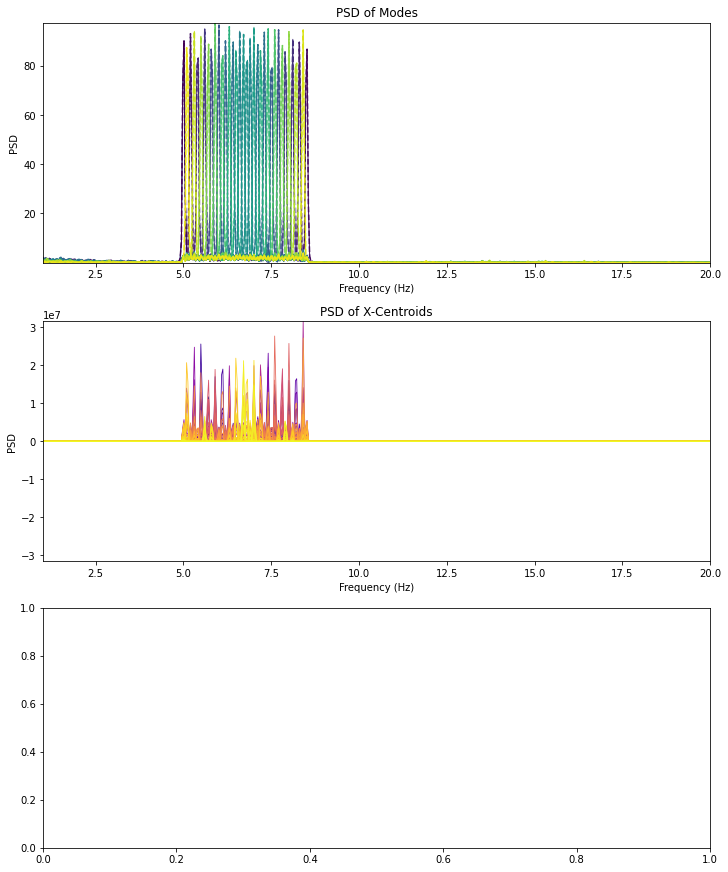

In [51]:
import matplotlib.pyplot as plt

# Define frequency axis limits and ranges
xrange = [max(minfreq - 10, 1), maxfreq + 10]
yrange_mod = [np.min(psdmod), np.max(psdmod[:, 5:])]
yrange_mes = [-np.max(np.abs(psdmes[:, 5:])), np.max(np.abs(psdmes[:, 5:]))]

# Setup 3 vertical subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12), constrained_layout=True)

# --- Plot 1: PSD of modes ---
axs[0].plot(freq, psdmod[0, :], label="Mode 0", linewidth=1)
for i in range(nmodes):
    color = plt.cm.viridis(i / nmodes)  # Gradient color
    axs[0].plot(freq, psdmod[i, :], color=color, linewidth=1)
    axs[0].plot(freq, filter * psdmod[i, :], color=color, linestyle='--')

axs[0].set_title("PSD of Modes")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("PSD")
axs[0].set_xlim(xrange)
axs[0].set_ylim(yrange_mod)

# --- Plot 2: PSD of X-centroids (0–143) ---
for i in range(nsub):
    color = plt.cm.plasma(i / nsub)
    axs[1].plot(freq, psdmes[i, :], color=color, linewidth=0.8)

axs[1].set_title("PSD of X-Centroids")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("PSD")
axs[1].set_xlim(xrange)
axs[1].set_ylim(yrange_mes)

# --- Plot 3: PSD of Y-centroids (144–287) ---
for i in range(nsub):
    color = plt.cm.plasma(i / nsub)
    axs[2].plot(freq, psdmes[i + nsub, :], color=color, linewidth=0.8)

axs[2].set_title("PSD of Y-Centroids")
axs[2].set_xlabel("Frequency (Hz)")
axs[2].set_ylabel("PSD")
axs[2].set_xlim(xrange)
axs[2].set_ylim(yrange_mes)

plt.show()


IndexError: index 288 is out of bounds for axis 0 with size 288

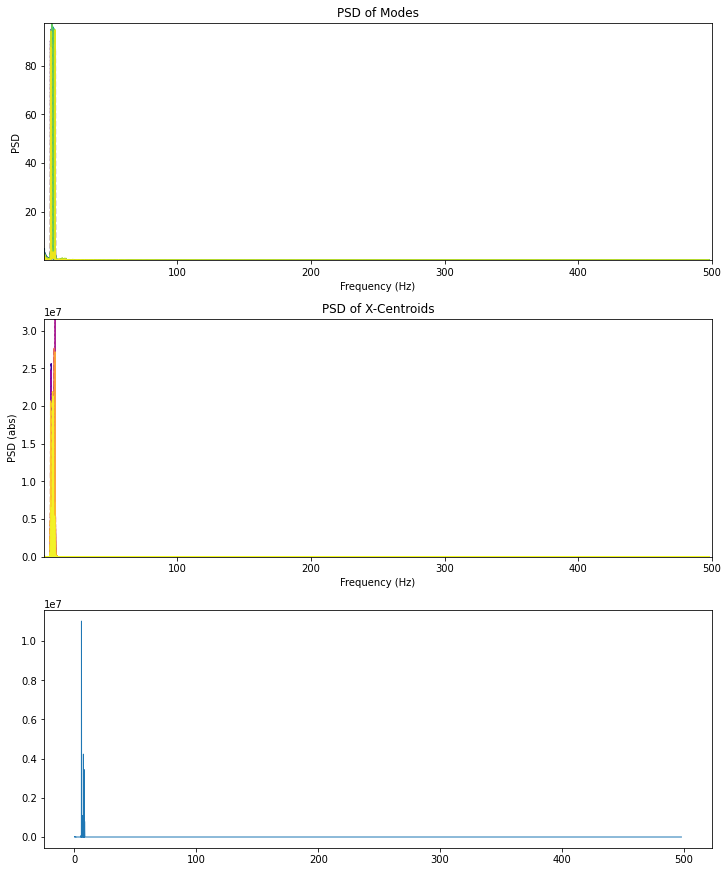

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Set up filtered indices
filtered_indices = np.where(filter)[0]

# Define frequency window
xstart = freq[5]
xrange = [xstart, 500]

# Y-axis range guards
yrange_mod = [np.min(psdmod), np.max(psdmod[:, 5:])]
psdmes_abs = np.abs(psdmes)
yrange_mes = [max(np.min(psdmes_abs), 1e-12), np.max(psdmes_abs[:, 5:])]

# Create figure with 3 vertical panels
fig, axs = plt.subplots(3, 1, figsize=(10, 12), constrained_layout=True)

# --- Plot 1: PSD of modes ---
axs[0].plot(freq, psdmod[0, :], label="Mode 0", linewidth=1)
for i in range(nmodes):
    color = plt.cm.viridis(i / nmodes)
    axs[0].plot(freq, psdmod[i, :], color=color, linewidth=1)
    axs[0].plot(freq[filtered_indices], psdmod[i, filtered_indices], color=color, linestyle='--')

axs[0].set_title("PSD of Modes")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("PSD")
axs[0].set_xlim(xrange)
axs[0].set_ylim(yrange_mod)

# --- Plot 2: PSD of X-centroids ---
axs[1].plot(freq, psdmes_abs[16, :], label="Centroid 16", linewidth=1)
for i in range(nsub):
    color = plt.cm.plasma(i / nsub)
    axs[1].plot(freq, psdmes_abs[i, :], color=color, linewidth=0.8)
    axs[1].plot(freq[filtered_indices], psdmes_abs[i, filtered_indices], color=color, linestyle='--')

axs[1].set_title("PSD of X-Centroids")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("PSD (abs)")
axs[1].set_xlim(xrange)
axs[1].set_ylim(yrange_mes)

# --- Plot 3: PSD of Y-centroids ---
axs[2].plot(freq, psdmes_abs[160, :], label="Centroid 160", linewidth=1)
for i in range(nsub):
    color = plt.cm.plasma(i / nsub)
    axs[2].plot(freq, psdmes_abs[i + nsub, :], color=color, linewidth=0.8)
    axs[2].plot(freq[filtered_indices], psdmes_abs[i + nsub, filtered_indices], color=color, linestyle='--')

axs[2].set_title("PSD of Y-Centroids")
axs[2].set_xlabel("Frequency (Hz)")
axs[2].set_ylabel("PSD (abs)")
axs[2].set_xlim(xrange)
axs[2].set_ylim(yrange_mes)

plt.show()


In [53]:
indexmax = np.zeros(nmodes, dtype=int)

for i in range(nmodes):
    filtered_psd = filter * np.abs(psdmod[i, :])
    max_val = np.max(filtered_psd)

    if max_val > thresh:
        idx_max = np.argmax(filtered_psd)
        print(f"{i:2d}", idx_max, freq[idx_max], psdmod[i, idx_max])
        indexmax[i] = idx_max
    else:
        indexmax[i] = 0


 0 135 5.0168888888888885 90.21167
 1 230 8.521333333333333 86.84989
 2 140 5.201333333333333 93.19903
 3 224 8.3 89.7155
 4 146 5.422666666666666 83.238
 5 219 8.115555555555554 90.86555
 6 151 5.607111111111111 94.99853
 7 213 7.894222222222223 85.774666
 8 156 5.791555555555556 86.84423
 9 208 7.709777777777778 94.72619
10 162 6.012888888888889 96.66163
11 203 7.525333333333333 79.49895
12 167 6.197333333333333 90.25881
13 197 7.304 93.766945
14 173 6.418666666666667 89.75571
15 192 7.119555555555555 88.72773
16 178 6.603111111111111 94.19274
17 186 6.898222222222222 91.32139
18 184 6.8244444444444445 82.34945
19 181 6.713777777777778 92.86058
20 189 7.0088888888888885 95.75601
21 175 6.492444444444444 86.4471
22 194 7.193333333333333 86.24537
23 170 6.308 96.02036
24 200 7.414666666666666 95.13461
25 165 6.123555555555556 84.17197
26 205 7.599111111111111 94.79794
27 159 5.902222222222222 97.60223
28 211 7.820444444444444 88.34776
29 154 5.717777777777778 88.87181
30 216 8.00488888

In [60]:
imatcacophony = np.zeros((288, nmodes), dtype=float)

for i in range(nmodes):
    idx = int(indexmax[i])
    # Average complex spectrum at +freq and -freq (symmetrically)
    complex_avg = (specmodmod[:, i, idx] + specmodmod[:, i, nsamp - idx]) / 2.0
    imatcacophony[:, i] = -1.0 * complex_avg.real  # Use real part like IDL's `float(...)`

print(imatcacophony.shape)

# Flip sign if closed-loop
if closed:
    imatcacophony *= -1.0

# If modal, transform into actuator space
if modal:
    # imatcacophony is (288, 36), mod2act is (288, nmodes)
    # IDL: imatcacophony = imatcacophony # mod2act
    # Python: matrix multiplication on the right: (288, 36) @ (36, 288)
    mod2act = np.linalg.pinv(mirmodes)
    imatcacophony = imatcacophony @ mod2act.T


(288, 36)


In [56]:
import numpy as np

def deriv1d(arr):
    """Approximate 1D derivative using central differences."""
    d = np.zeros_like(arr)
    d[1:-1] = (arr[2:] - arr[:-2]) / 2.0
    d[0] = arr[1] - arr[0]       # forward difference at start
    d[-1] = arr[-1] - arr[-2]    # backward difference at end
    return d

def deriv2D(ima, x=False, y=False):
    """
    Compute 1D derivative of a 2D image array along x or y direction.

    Parameters
    ----------
    ima : 2D np.ndarray
        Input image or 2D array.
    x : bool
        If True, compute derivative along x-axis (columns).
    y : bool
        If True, compute derivative along y-axis (rows).

    Returns
    -------
    result : 2D np.ndarray
        Array of same shape as ima with derivatives computed.
    """
    result = np.zeros_like(ima)

    if y:
        for i in range(ima.shape[0]):
            result[i, :] = deriv1d(ima[i, :])
    else:
        for i in range(ima.shape[1]):
            result[:, i] = deriv1d(ima[:, i])

    return result


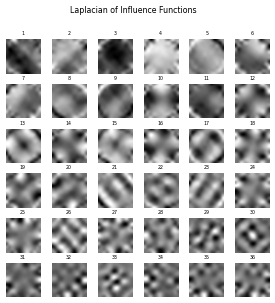

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# Assumes: imatcacophony, deriv2D already exist
laplacian_flag = True
if laplacian_flag:  # this replaces IDL's `if keyword_set(laplacian)`
    inffuncdx = np.zeros((12, 12, 36), dtype=float)
    inffuncdy = np.zeros((12, 12, 36), dtype=float)
    laplacian = np.zeros((12, 12, 36), dtype=float)

    for i in range(36):
        inffuncdx[:, :, i] = imatcacophony[0:144, i].reshape(12, 12)
        inffuncdy[:, :, i] = imatcacophony[144:288, i].reshape(12, 12)
        laplacian[:, :, i] = deriv2D(inffuncdy[:, :, i], y=True) + deriv2D(inffuncdx[:, :, i], x=True)

    # --- Visualization ---
    imsize = 800
    fig, axarr = plt.subplots(6, 6, figsize=(6, 6), dpi=imsize // 14)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for j in range(6):
        for i in range(6):
            idx = j * 6 + i
            ax = axarr[j, i]
            zoomed_img = zoom(laplacian[:, :, idx], imsize / 12)  # congrid-like
            ax.imshow(zoomed_img, cmap='gray', origin='lower')
            ax.set_title(f'{idx+1}', fontsize=6)
            ax.axis('off')

    plt.suptitle("Laplacian of Influence Functions", fontsize=10)
    plt.show()
